In [ ]:
# Austin Diamond

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Example: Boston Housing Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
housing_df = pd.read_csv(url)

In [ ]:
housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# assign values to X and y
X = housing_df.drop('medv', axis=1)

In [ ]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
y = housing_df["medv"]

In [ ]:
# split into train and test subset
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# scale the data for X_train and X_test
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
# transform/scale the data
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
#build a multiple regression model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [ ]:
# fit the model
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# make predictions using x_test_scaled
y_pred = linreg.predict(X_test_scaled)

In [ ]:
# create dataframe of results (predicted, actual, residual error)
housing_results_df = pd.DataFrame({
    "Predicted": y_pred,
    "Actual": y_test,
    "Residual": y_test - y_pred
})

In [ ]:
housing_results_df.head()

,Predicted,Actual,Residual
173,28.648960,23.6,-5.048960
274,36.495014,32.4,-4.095014
491,15.411193,13.6,-1.811193
72,25.403213,22.8,-2.603213
452,18.855280,16.1,-2.755280


Text(0.5, 1.0, 'Residuals for Regression Model')

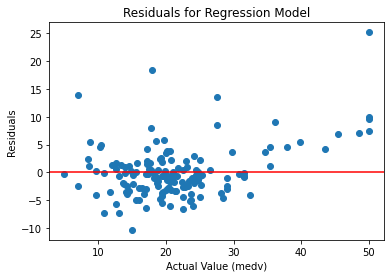

In [ ]:
plt.scatter(housing_results_df.Actual, housing_results_df.Residual)
plt.axhline(y=0, color='r', linestyle='-')

plt.xlabel("Actual Value (medv)")
plt.ylabel("Residuals")
plt.title("Residuals for Regression Model")

## Regression Error Metrics
### Calculate the MSE and RMSE
- Mean Square Error (MSE)—is the average of the square of the errors. The larger the number the larger the error.
<img src="attachment:image.png" width="300px">

In [ ]:
from sklearn import metrics

In [ ]:
print("R2: ", metrics.r2_score(y_test, y_pred).round(2))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred).round(2))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2))

R2:  0.71
MSE:  21.52
RMSE:  4.64


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# import RFE
from sklearn.feature_selection import RFE

In [ ]:
# construct RFE model
rfe = RFE(linreg, n_features_to_select=6)

In [ ]:
# fit the RFE model
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [ ]:
# relative ranking
pd.DataFrame(rfe.ranking_, index=X.columns, columns=["Rank"]).sort_values(by="Rank")

,Rank
crim,1
nox,1
rm,1
dis,1
ptratio,1
lstat,1
rad,2
b,3
tax,4
chas,5


In [ ]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [ ]:
rfe.support_

NameError: ignored

In [ ]:
X_train[X_train.columns[rfe.support_]]

,crim,nox,rm,dis,ptratio,lstat
5,0.02985,0.458,6.430,6.0622,18.7,5.21
116,0.13158,0.547,6.176,2.7301,17.8,12.04
45,0.17142,0.448,5.682,5.1004,17.9,10.21
16,1.05393,0.538,5.935,4.4986,21.0,6.58
468,15.57570,0.580,5.926,2.9084,20.2,18.13
...,...,...,...,...,...,...
106,0.17120,0.520,5.836,2.2110,20.9,18.66
270,0.29916,0.464,5.856,4.4290,18.6,13.00
348,0.01501,0.435,6.635,8.3440,17.0,5.99
435,11.16040,0.740,6.629,2.1247,20.2,23.27


In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [ ]:
X_train_rfe.head()

,crim,nox,rm,dis,ptratio,lstat
5,0.02985,0.458,6.430,6.0622,18.7,5.21
116,0.13158,0.547,6.176,2.7301,17.8,12.04
45,0.17142,0.448,5.682,5.1004,17.9,10.21
16,1.05393,0.538,5.935,4.4986,21.0,6.58
468,15.57570,0.580,5.926,2.9084,20.2,18.13


In [ ]:
X_test_rfe.head()

,crim,nox,rm,dis,ptratio,lstat
173,0.09178,0.510,6.416,2.6463,16.6,9.04
274,0.05644,0.447,6.758,4.0776,17.6,3.53
491,0.10574,0.609,5.983,1.8681,20.1,18.07
72,0.09164,0.413,6.065,5.2873,19.2,5.52
452,5.09017,0.713,6.297,2.3682,20.2,17.27


In [ ]:
# scale rfe data
scaler_rfe = StandardScaler().fit(X_train_rfe)

In [ ]:
# transform/scale rfe data
X_train_rfe_scaled = scaler_rfe.transform(X_train_rfe)
X_test_rfe_scaled = scaler_rfe.transform(X_test_rfe)

In [ ]:
# build new reg model using rfe selection
linreg.fit(X_train_rfe_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_rfe = linreg.predict(X_test_rfe_scaled)

In [ ]:
print("R2: ", metrics.r2_score(y_test, y_pred).round(2))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred).round(2))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2))

R2:  0.71
MSE:  21.52
RMSE:  4.64
